In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
import matplotlib.pyplot as plt

In [48]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [49]:
train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0], inplace=True)
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['VIP'].fillna(train_df['VIP'].mode()[0], inplace=True)
train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0], inplace=True)
train_df['Destination'].fillna(train_df['Destination'].mode()[0], inplace=True)
train_df['Cabin'].fillna('Unknown/0/U', inplace=True)

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_20332\2763884191.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0], inplace=True)
C:\Users\PPLG15\AppData\Local\Temp\ipykernel_20332\2763884191.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df

In [50]:
train_df[['Deck', 'Num', 'Side']] = train_df['Cabin'].str.split('/', expand=True)

In [51]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    train_df[col].fillna(0, inplace=True)

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_20332\2106652711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(0, inplace=True)


In [52]:
train_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)

In [53]:
le = LabelEncoder()
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']:
    train_df[col] = le.fit_transform(train_df[col])

In [54]:
scaler = StandardScaler()
scaled_columns = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Num']
train_df[scaled_columns] = scaler.fit_transform(train_df[scaled_columns])

In [55]:
X = train_df.drop('Transported', axis=1)
y = train_df['Transported']

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

c:\Users\PPLG15\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:43:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [58]:
y_pred = xgb_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Classification Accuracy on validation set: {accuracy:.4f}')

Classification Accuracy on validation set: 0.7918


In [59]:
test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['VIP'].fillna(test_df['VIP'].mode()[0], inplace=True)
test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0], inplace=True)
test_df['Destination'].fillna(test_df['Destination'].mode()[0], inplace=True)
test_df['Cabin'].fillna('Unknown/0/U', inplace=True)

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_20332\1909774714.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0], inplace=True)
C:\Users\PPLG15\AppData\Local\Temp\ipykernel_20332\1909774714.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df['C

In [60]:
test_df[['Deck', 'Num', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

In [61]:
for col in ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']:
    test_df[col].fillna(0, inplace=True)

C:\Users\PPLG15\AppData\Local\Temp\ipykernel_20332\2216759561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(0, inplace=True)


In [62]:
test_df.drop(['PassengerId', 'Cabin', 'Name'], axis=1, inplace=True)

In [63]:
for col in ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']:
    test_df[col] = le.fit_transform(test_df[col])

In [64]:
test_df[scaled_columns] = scaler.transform(test_df[scaled_columns])

In [65]:
test_predictions = xgb_model.predict(test_df)

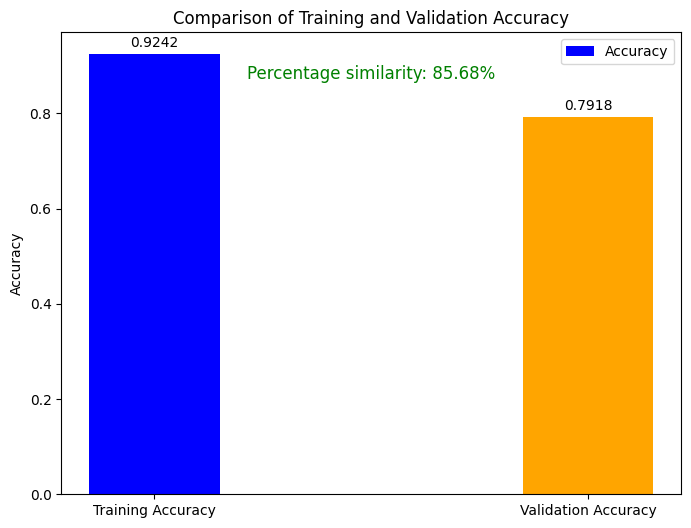

In [68]:
train_predictions = xgb_model.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

val_predictions = xgb_model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)

percentage_similarity = (1 - abs(train_accuracy - val_accuracy) / train_accuracy) * 100

accuracy_values = [train_accuracy, val_accuracy]
labels = ['Training Accuracy', 'Validation Accuracy']

x = np.arange(len(labels))
width = 0.3

fig, ax = plt.subplots(figsize=(8, 6))

rects1 = ax.bar(x, accuracy_values, width, label='Accuracy', color=['blue', 'orange'])

ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Training and Validation Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',  
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)

ax.text(0.5, 0.9, f'Percentage similarity: {percentage_similarity:.2f}%',
        transform=ax.transAxes, fontsize=12, color='green', ha='center')

plt.show()

In [67]:
output_df = pd.DataFrame({'PassengerId': pd.read_csv('test.csv')['PassengerId'], 'Transported': test_predictions})
output_df['Transported'] = output_df['Transported'].astype(bool) 
output_df.to_csv('test_predictions.csv', index=False)
print('Predictions saved to test_predictions.csv')

Predictions saved to test_predictions.csv
